In [19]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model


### Data preprocessing



In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [21]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

### Building the CNN model

In [22]:
model = Sequential()

model.add(Conv2D(32,(3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,578 (68.66 KB)

 Trainable params: 17,578 (68.66 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='max')


mc = ModelCheckpoint('./Aikins_cnn_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


cb = [es, mc]

### Training the model

In [25]:
model.fit(X_train, y_train, epochs=50, validation_split=0.3, callbacks=cb)

Epoch 1/50
1305/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8170 - loss: 0.5754
Epoch 1: val_accuracy improved from -inf to 0.97206, saving model to ./Aikins_cnn_model.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8176 - loss: 0.5734 - val_accuracy: 0.9721 - val_loss: 0.0907
Epoch 2/50
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9689 - loss: 0.0995
Epoch 2: val_accuracy improved from 0.97206 to 0.97728, saving model to ./Aikins_cnn_model.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9689 - loss: 0.0995 - val_accuracy: 0.9773 - val_loss: 0.0712
Epoch 3/50
1303/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9786 - loss: 0.0679
Epoch 3: val_accuracy improved from 0.97728 to 0.98133, saving model to ./Aikins_cnn_model.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9786 - loss: 0.0679 - val_accuracy: 0.9813 - val_loss: 0.0589
Epoch 4/50
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9813 - loss: 0.0581
Epo

### Save Model

In [26]:
model.save('Aikins_cnn_model.keras')

### Making predictions and evaluating the model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


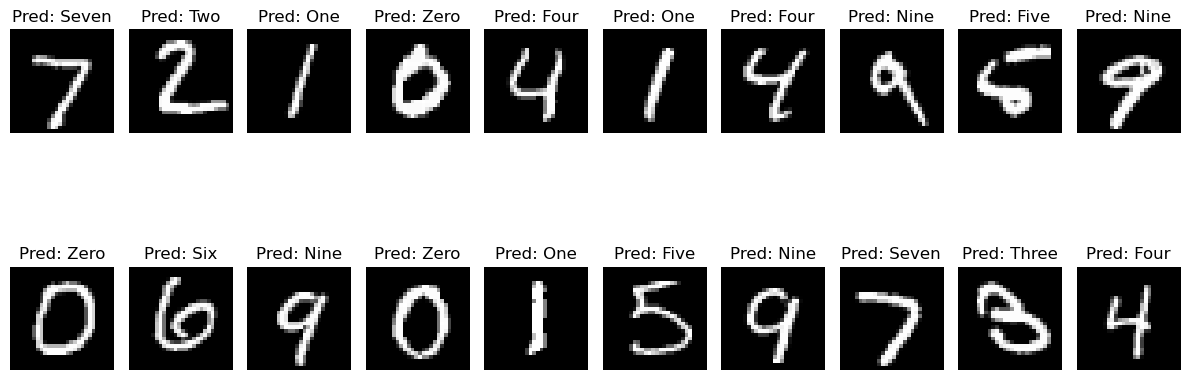

In [27]:
labels = {0: 'Zero', 1: 'One', 2: 'Two', 3: 'Three', 4: 'Four', 
          5: 'Five', 6: 'Six', 7: 'Seven', 8: 'Eight', 9: 'Nine'}

predictions = model.predict(X_test)

predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

predicted_text_labels = [labels[label] for label in predicted_labels]
true_text_labels = [labels[label] for label in true_labels]

def display_predictions(images, true_labels, predicted_labels, num=10):
    plt.figure(figsize=(12, 6))
    for i in range(num):
        plt.subplot(2, num // 2, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {predicted_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


display_predictions(X_test, true_text_labels, predicted_text_labels, num=20)




In [28]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 - 0s - 2ms/step - accuracy: 0.9903 - loss: 0.0304
Test Accuracy: 99.03%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


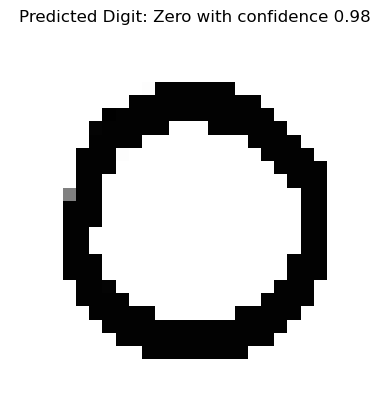

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


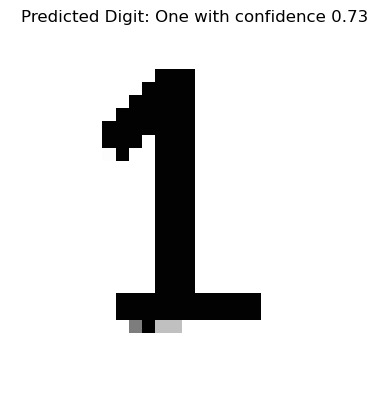

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


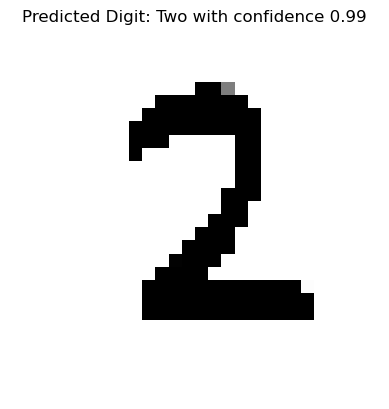

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


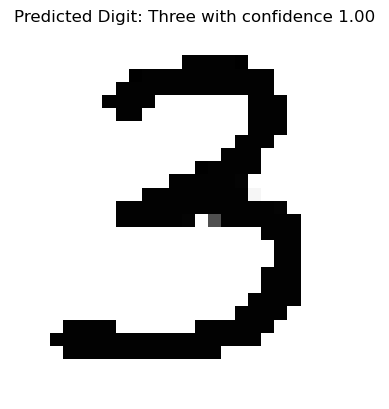

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


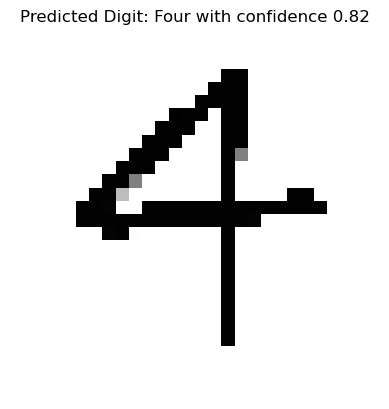

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


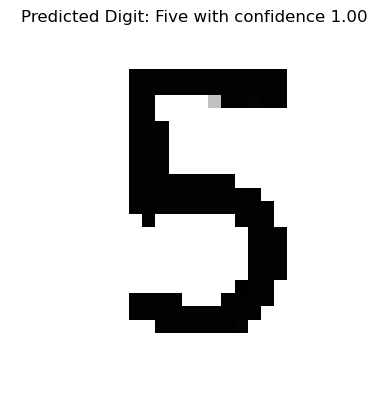

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


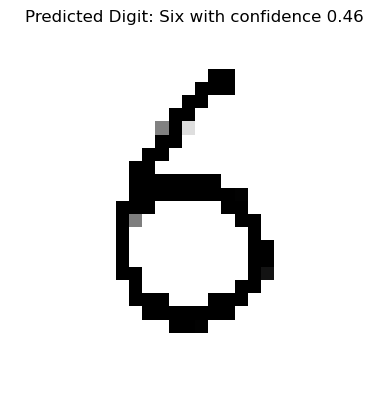

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


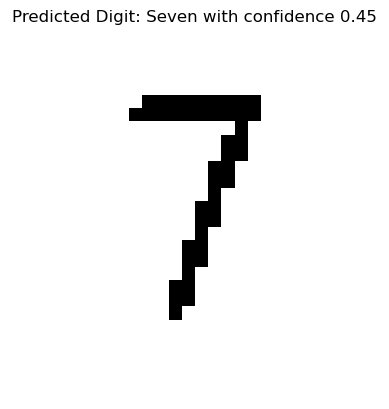

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


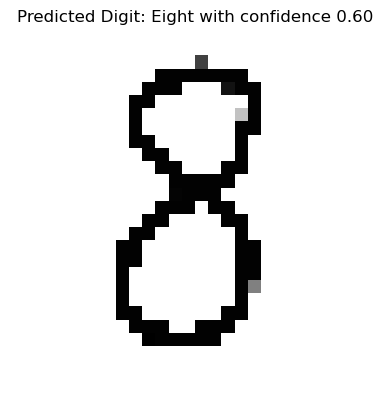

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


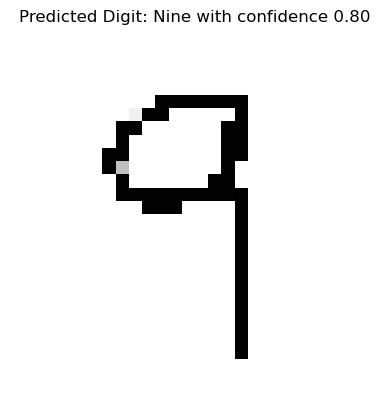

In [ ]:
import cv2

MODEL = load_model('Aikins_cnn_model.keras')

def preprocess_image(image_path):
    """
    Preprocess the input image to match the model's expected input.
    """
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize to 28x28 pixels
    image = cv2.resize(image, (28, 28))
    
    # Normalize pixel values to [0, 1]
    image = image / 255.0
    
    # Invert colors if necessary
    image = 1 - image  # Uncomment if the model was trained on inverted colors
    # plt.imshow(image)

    # Reshape to match model input (1, 28, 28, 1)
    image = image.reshape(1, 28, 28, 1)
    
    return image

def predict_digit(image_path):
    """
    Predict the digit in the input image.
    """
    labels = {
        0: 'Zero', 1: 'One', 2: 'Two', 3: 'Three', 4: 'Four', 
        5: 'Five', 6: 'Six', 7: 'Seven', 8: 'Eight', 9: 'Nine'
    }

    processed_image = preprocess_image(image_path)
    prediction = MODEL.predict(processed_image)
    confidence = np.max(prediction)
    predicted_label = np.argmax(prediction)
    return labels[predicted_label], confidence


for i in range(10):
    image_path = f'dataset/{i}.jpg'
    label, conf = predict_digit(image_path)
    img = load_img(image_path, target_size=(28, 28), color_mode='grayscale')
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Digit: {label} with confidence {conf:.2f}")
    plt.axis('off')
    plt.show()
